# Introduction to Scikit-Learn: Machine Learning with Python

**Unsupervised Learning**

Tony Yao-Jen Kuo

##  Unsupervised Learning

## About unsupervised learning

**Unsupervised Learning** addresses a different sort of problem. Here the data has no labels and we are interested in finding similarities between the objects in question.

## Unsupervised learning comprises tasks such as *dimensionality reduction* and *clustering*

## Some more involved unsupervised learning problems are:

- given detailed observations of distant galaxies, determine which features or combinations of features best summarize the information.
- given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.

## Dimensionality Reduction: Principal Component Analysis

## About Principal Component Analysis

Principal Component Analysis is a unsupervised method for *dimensionality reduction* in data. It is easiest to visualize a two-dimensional dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal')
plt.title("400 data points")

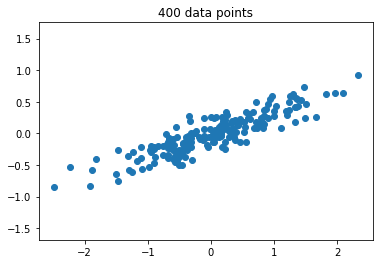

In [2]:
plt.show()

## A definite trend in the data

What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution.

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal')

(-2.7292712056271964,
 2.5702744393352615,
 -0.94976083863634764,
 1.0052301483776818)

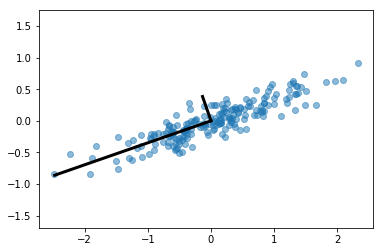

In [4]:
plt.show()

## One vector is longer than the other

- Direction in the data is somehow more "important" than the other direction

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [5]:
pca = PCA(0.95) # keep 95% of variance
X_trans = pca.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


## The data is now compressed by a factor of 50%

We throw away 5% of the variance! Let's see what the data look like after this compression:

In [6]:
X_new = pca.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal')
plt.title("200 data points")

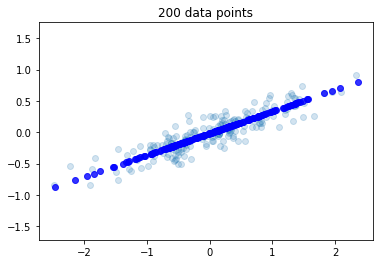

In [7]:
plt.show()

## The Effect of PCA

- After truncating 5% of the variance of this dataset, the "most important" features of the data are maintained, and we've compressed the data by 50%!
- This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.

## Application of PCA to MNIST

In [8]:
train_url = "https://storage.googleapis.com/kaggle_datasets/Digit-Recognizer/train.csv"
train = pd.read_csv(train_url)

In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(train.loc[i, "pixel0":].values.reshape(28, 28), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(train.loc[i, "label"]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

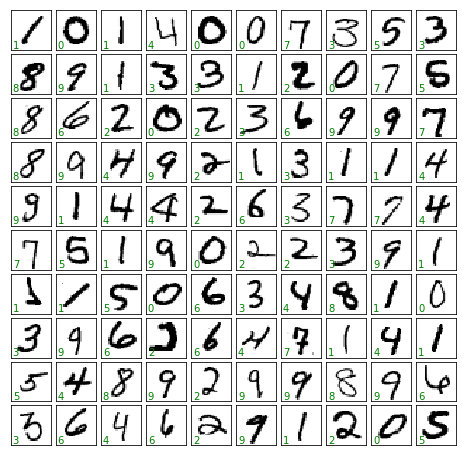

In [11]:
plt.show()

In [12]:
X_train = train.loc[:, "pixel0":]
y_train = train.loc[:, "label"]
pca = PCA(2)  # project from 784 to 2 dimensions
Xproj = pca.fit_transform(X_train)
print(X_train.shape)
print(Xproj.shape)

(42000, 784)
(42000, 2)


In [13]:
print(pca.components_.shape)
print(pca.components_)

(2, 784)
[[  1.44238118e-18  -7.56671136e-19   1.70883651e-19 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]
 [  3.64894853e-17  -1.56859475e-17   8.39146030e-19 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]]


In [14]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

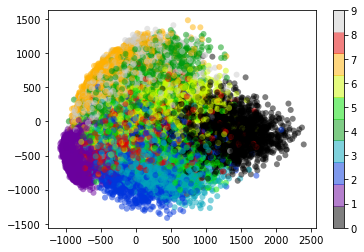

In [15]:
plt.show()

## We have found the optimal stretch and rotation in 784-dimensional space

### Choosing the Number of Components

But how much information have we thrown away?  We can figure this out by looking at the **explained variance** as a function of the components:

In [16]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

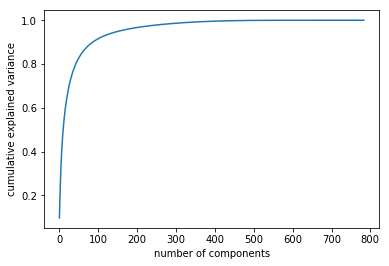

In [17]:
plt.show()

## We'd need about 100 components to retain 90% of the variance

Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

## Clustering: K-Means

## About K-Means

- K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels)
- K Means searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to

In [18]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("It is relatively easy to pick out the four clusters")

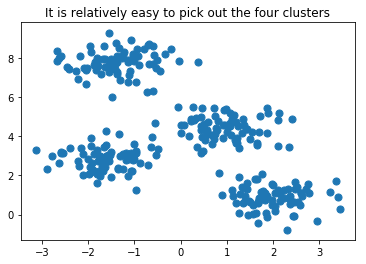

In [19]:
plt.show()

## K-Means is an example of an algorithm which uses an *Expectation-Maximization* approach to arrive at the solution.

## Expectation-Maximization is a two-step approach

1. Guess some cluster centers
2. Repeat until converged
    1. Assign points to the nearest cluster center
    2. Set the cluster centers to the mean

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(4)  # 4 clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow')

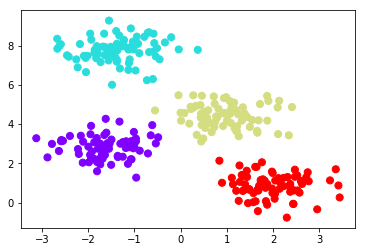

In [21]:
plt.show()

## Application of KMeans to MNIST

In [22]:
train_url = "https://storage.googleapis.com/kaggle_datasets/Digit-Recognizer/train.csv"
train = pd.read_csv(train_url)

In [23]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(train.loc[:, "pixel0":])
print(kmeans.cluster_centers_.shape)
print(clusters)

(10, 784)
[4 0 9 ..., 5 6 1]


## We see ten clusters in 784 dimensions

Let's visualize each of these cluster centers to see what they represent.

In [25]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(kmeans.cluster_centers_[i].reshape((28, 28)), cmap=plt.cm.binary)

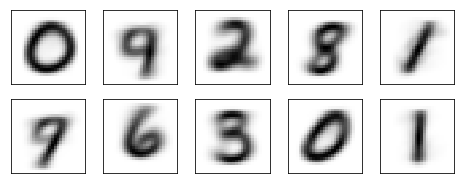

In [26]:
plt.show()

## With apologies to the number 4, 5, or 7!

## Let's use our PCA visualization and look at the true cluster labels and K-means cluster labels

In [27]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(train.loc[:, "pixel0":])

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10), edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=clusters, **kwargs)
ax[0].set_title('learned cluster labels')
ax[1].scatter(X[:, 0], X[:, 1], c=train.loc[:, "label"], **kwargs)
ax[1].set_title('true labels')

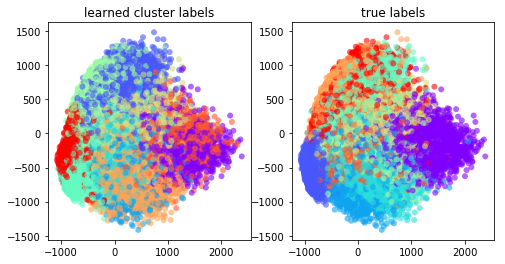

In [28]:
plt.show()